<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/EEG_Connectivity_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.2 MB/s eta 0:00:00


In [2]:
pip install --upgrade mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mounted at /content/gdrive


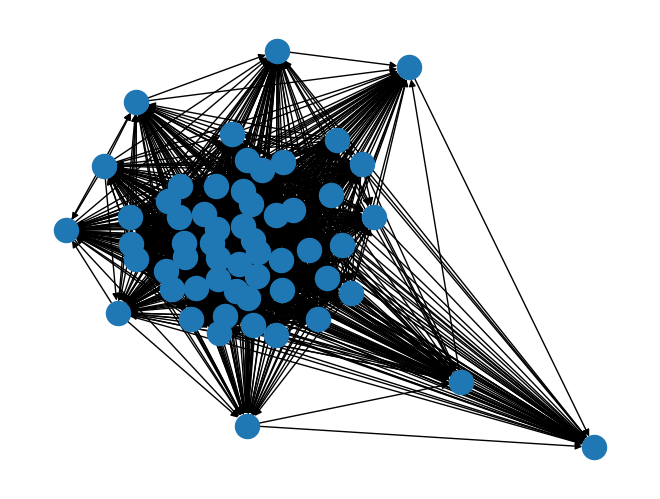

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import networkx as nx

from google.colab import drive
drive.mount('/content/gdrive')

# Load the CSV file and extract the adjacency matrix
# file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
input_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv", index_col=0)
G = nx.DiGraph(input_data.values)
nx.draw(G)


In [ ]:
import pandas as pd

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values


In [ ]:
import networkx as nx
from networkx.algorithms import smallworld


In [ ]:
graph = nx.from_numpy_array(adjacency_matrix)


In [ ]:
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)


Small World Index: 1.0


Small World Index: 1.0000000000000002


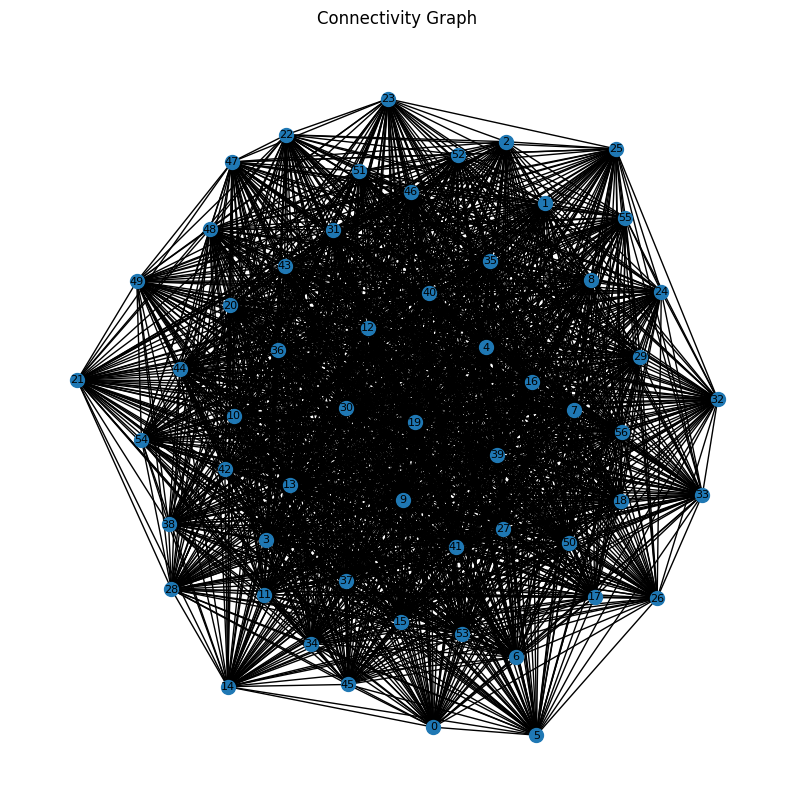

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = 0.05 * adjacency_matrix.max()

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Plot the graph with labels
pos = nx.spring_layout(graph)  # Define the layout for the nodes
labels = {i: str(i) for i in range(len(graph.nodes()))}  # Create labels for the nodes

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()


Small World Index: 1.4497470652045499


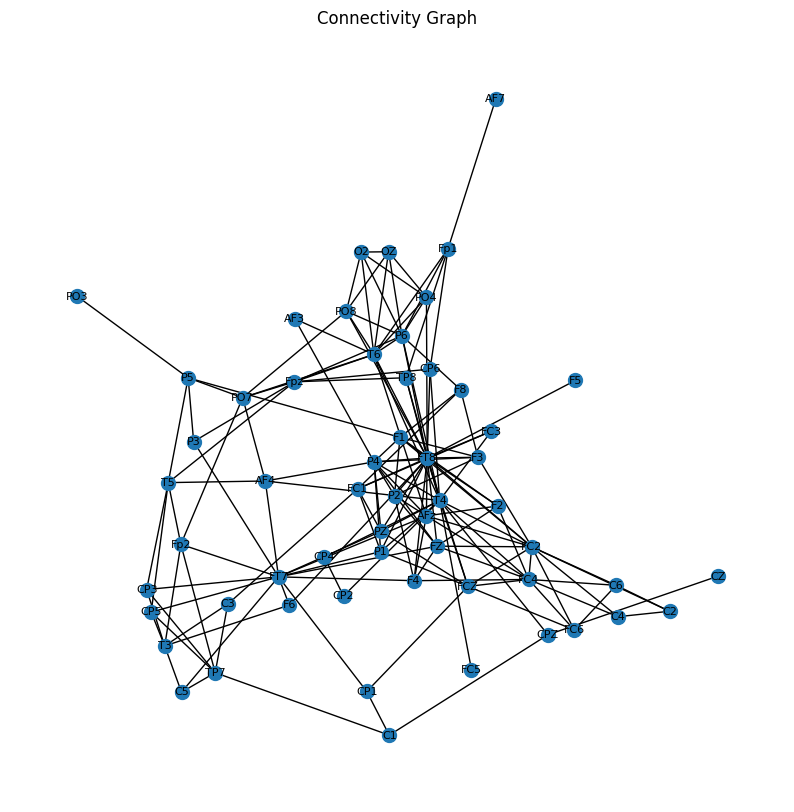

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld
import numpy as np

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = np.percentile(adjacency_matrix, 95)

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Plot the graph with labels
pos = nx.spring_layout(graph)  # Define the layout for the nodes
labels = {i: str(label) for i, label in enumerate(data.index)}  # Use row labels as node labels

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()


Small World Index: 1.0


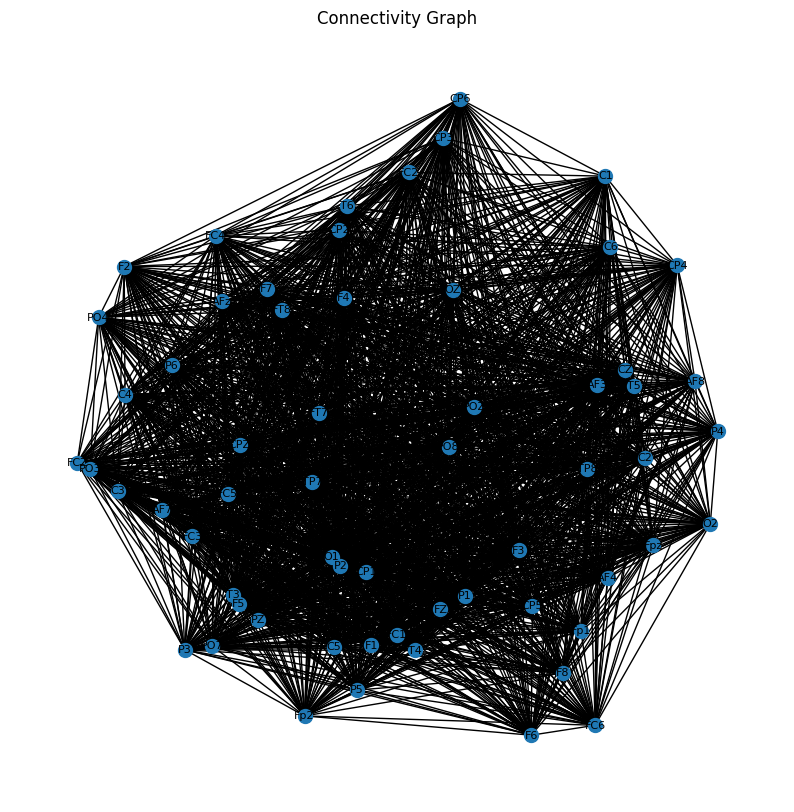

Montage saved to Channels.csv


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld
import numpy as np
import csv

def save_to_csv(montage, file_path):
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Electrode", "X", "Y"])  # Write header
        writer.writerows(montage)

    print("Montage saved to Channels.csv")

file_path = "/content/gdrive/My Drive/Colab Notebooks/1IEDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = np.percentile(adjacency_matrix, 50)  # Change to 50%

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Load electrode locations from the Channels.csv file
channels_file_path = "/content/gdrive/My Drive/Colab Notebooks/Channels.csv"
with open(channels_file_path, "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    electrode_locations = [row for row in reader]

# Extract the X and Y coordinates from the electrode locations
electrode_coords = [[float(electrode[1]), float(electrode[2])] for electrode in electrode_locations]

# Create a dictionary to map electrode labels to coordinates
electrode_dict = dict(zip(data.index, electrode_coords))

# Plot the graph with labels and spatial positions
pos = nx.spring_layout(graph, dim=2, pos=electrode_dict, seed=42)  # Define the layout for the nodes
labels = {i: str(label) for i, label in enumerate(data.index)}  # Use row labels as node labels

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()

# Save the modified electrode locations back to the Channels.csv file
save_to_csv(electrode_coords, channels_file_path)


Small World Index: 1.0


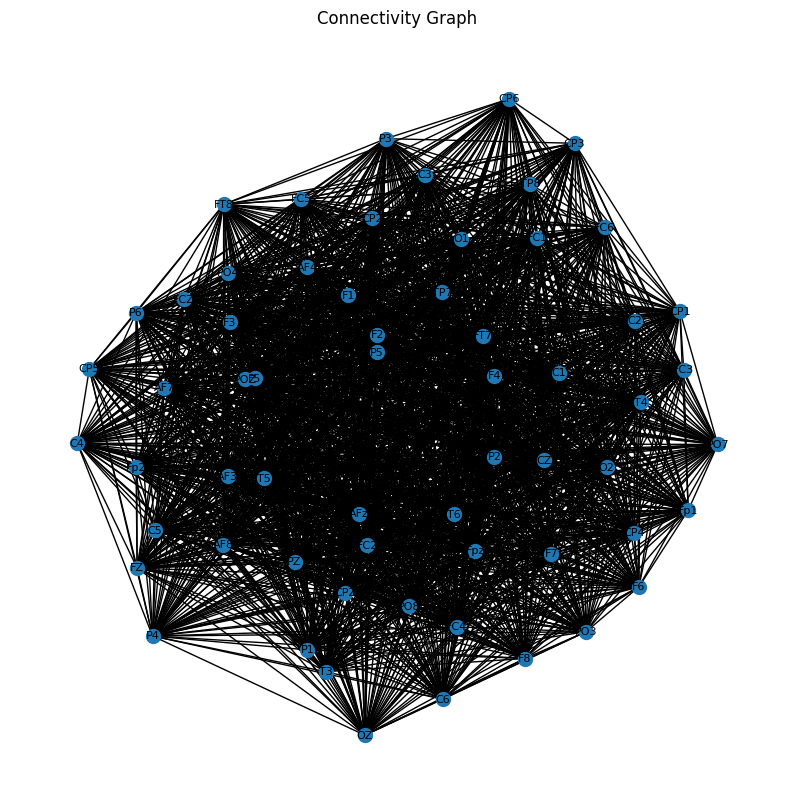

Montage saved to Channels.csv


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld
import csv

def save_to_csv(montage, file_path):
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Electrode", "X", "Y"])  # Write header
        writer.writerows(montage)

    print("Montage saved to Channels.csv")

file_path = "/content/gdrive/My Drive/Colab Notebooks/1IEDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = np.percentile(adjacency_matrix, 50)

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Standard positions of the electrodes based on the 10-20 international system
standard_positions = {
    "AF7": (-5, 10),
    "AF3": (-3.5, 9),
    "Fp1": (-2, 8),
    "Fp2": (2, 8),
    "AF4": (3.5, 9),
    "AF8": (5, 10),
    "F7": (-6, 7),
    "F5": (-5, 6),
    "F3": (-4, 6),
    "F1": (-3, 6),
    "F2": (3, 6),
    "F4": (4, 6),
    "F6": (5, 6),
    "F8": (6, 7),
    "FT7": (-7, 5),
    "FC5": (-6, 4),
    "FC3": (-5, 4),
    "FC1": (-4, 4),
    "FC2": (4, 4),
    "FC4": (5, 4),
    "FC6": (6, 4),
    "FT8": (7, 5),
    "T3": (-7, 3),
    "C5": (-6, 2),
    "C3": (-5, 2),
    "C1": (-4, 2),
    "C2": (4, 2),
    "C4": (5, 2),
    "C6": (6, 2),
    "T4": (7, 3),
    "TP7": (-7, 1),
    "CP5": (-6, 0),
    "CP3": (-5, 0),
    "CP1": (-4, 0),
    "CP2": (4, 0),
    "CP4": (5, 0),
    "CP6": (6, 0),
    "TP8": (7, 1),
    "T5": (-6, -1),
    "P5": (-5, -2),
    "P3": (-4, -2),
    "P1": (-3, -2),
    "P2": (3, -2),
    "P4": (4, -2),
    "P6": (5, -2),
    "T6": (6, -1),
    "Fpz": (0, 8),
    "PO7": (-6, -5),
    "PO3": (-4, -5),
    "O1": (-3.5, -6),
    "O2": (3.5, -6),
    "PO4": (4, -5),
    "PO8": (6, -5),
    "OZ": (0, -6),
    "AFz": (0, 10),
    "FZ": (0, 6),
    "FCZ": (0, 4),
    "CZ": (0, 2),
    "CPZ": (0, 0),
    "PZ": (0, -2),
    "POZ": (0, -5)
}

# Map electrode labels to standard positions
electrode_dict = {electrode: standard_positions[electrode] for electrode in standard_positions}

# Plot the graph with labels and spatial positions
pos = nx.spring_layout(graph, dim=2, pos=electrode_dict, seed=42)  # Define the layout for the nodes
labels = {i: str(label) for i, label in enumerate(data.index)}  # Use row labels as node labels

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()

# Save the electrode positions to the Channels.csv file
electrode_coords = [(electrode, pos[electrode][0], pos[electrode][1]) for electrode in pos]
save_to_csv(electrode_coords, channels_file_path)


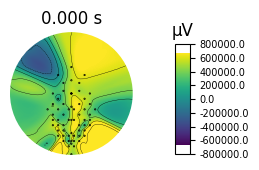

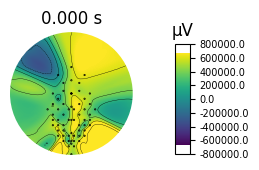

In [16]:
import pandas as pd
import numpy as np
import mne

# Load the CSV matrix data
csv_file_path = "/content/gdrive/My Drive/Colab Notebooks/1IEDo_matrix_sensors_wpli.csv"
data = pd.read_csv(csv_file_path, index_col=0)
adjacency_matrix = data.values

# Create MNE info structure
ch_names = data.columns.tolist()  # Electrode labels
ch_types = ['eeg'] * len(ch_names)  # Electrode type (assuming EEG data)
info = mne.create_info(ch_names, sfreq=1000, ch_types=ch_types)

# Define electrode positions manually
electrode_positions = {
    'AF7': (-5, 7, 0),
    'AF3': (-3, 4, 0),
    'Fp1': (-3, 1, 0),
    'Fp2': (3, 1, 0),
    'AF4': (3, 4, 0),
    'AF8': (5, 7, 0),
    'F7': (-7, 0, 0),
    'F5': (-5, -2, 0),
    'F3': (-3, -4, 0),
    'F1': (-1, -6, 0),
    'F2': (1, -6, 0),
    'F4': (3, -4, 0),
    'F6': (5, -2, 0),
    'F8': (7, 0, 0),
    'FT7': (-7, -4, 0),
    'FC5': (-5, -6, 0),
    'FC3': (-3, -8, 0),
    'FC1': (-1, -10, 0),
    'FC2': (1, -10, 0),
    'FC4': (3, -8, 0),
    'FC6': (5, -6, 0),
    'FT8': (7, -4, 0),
    'T3': (-9, -6, 0),
    'C5': (-7, -8, 0),
    'C3': (-5, -10, 0),
    'C1': (-3, -12, 0),
    'C2': (3, -12, 0),
    'C4': (5, -10, 0),
    'C6': (7, -8, 0),
    'T4': (9, -6, 0),
    'TP7': (-7, -10, 0),
    'CP5': (-5, -12, 0),
    'CP3': (-3, -14, 0),
    'CP1': (-1, -16, 0),
    'CP2': (1, -16, 0),
    'CP4': (3, -14, 0),
    'CP6': (5, -12, 0),
    'TP8': (7, -10, 0),
    'T5': (-7, -12, 0),
    'P5': (-5, -14, 0),
    'P3': (-3, -16, 0),
    'P1': (-1, -18, 0),
    'P2': (1, -18, 0),
    'P4': (3, -16, 0),
    'P6': (5, -14, 0),
    'T6': (7, -12, 0),
    'Fpz': (0, 10, 0),
    'PO7': (-5, -16, 0),
    'PO3': (-3, -18, 0),
    'O1': (-1, -20, 0),
    'O2': (1, -20, 0),
    'PO4': (3, -18, 0),
    'PO8': (5, -16, 0),
    'OZ': (0, -19, 0),
    'AFz': (0, 5, 0),
    'FZ': (0, 0, 0),
    'FCZ': (0, -5, 0),
    'CZ': (0, -10, 0),
    'CPZ': (0, -15, 0),
    'PZ': (0, -18, 0),
    'POZ': (0, -23, 0),
}

# Create custom montage
montage = mne.channels.make_dig_montage(ch_pos=electrode_positions, coord_frame='head')
info.set_montage(montage)

# Create MNE EvokedArray object
evoked = mne.EvokedArray(adjacency_matrix, info)

# Plot scalp surface
evoked.plot_topomap(times=0, cmap='viridis')


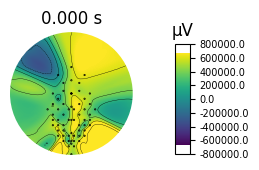

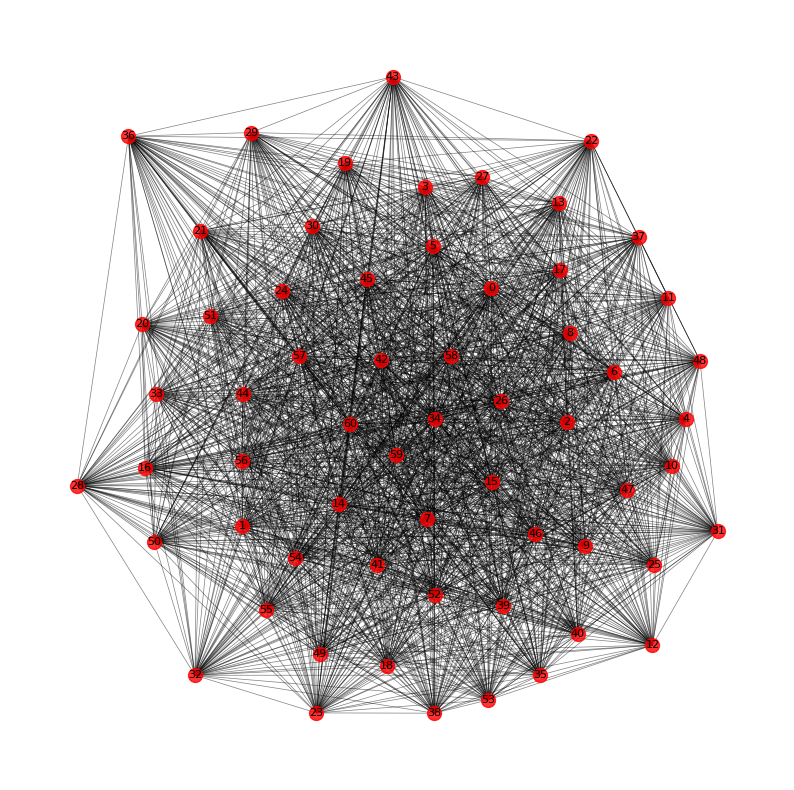

In [17]:
import pandas as pd
import numpy as np
import mne
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV matrix data
csv_file_path = "/content/gdrive/My Drive/Colab Notebooks/1IEDo_matrix_sensors_wpli.csv"
data = pd.read_csv(csv_file_path, index_col=0)
adjacency_matrix = data.values

# Create MNE info structure
ch_names = data.columns.tolist()  # Electrode labels
ch_types = ['eeg'] * len(ch_names)  # Electrode type (assuming EEG data)
info = mne.create_info(ch_names, sfreq=1000, ch_types=ch_types)

# Define electrode positions manually
electrode_positions = {
    'AF7': (-5, 7, 0),
    'AF3': (-3, 4, 0),
    'Fp1': (-3, 1, 0),
    'Fp2': (3, 1, 0),
    'AF4': (3, 4, 0),
    'AF8': (5, 7, 0),
    'F7': (-7, 0, 0),
    'F5': (-5, -2, 0),
    'F3': (-3, -4, 0),
    'F1': (-1, -6, 0),
    'F2': (1, -6, 0),
    'F4': (3, -4, 0),
    'F6': (5, -2, 0),
    'F8': (7, 0, 0),
    'FT7': (-7, -4, 0),
    'FC5': (-5, -6, 0),
    'FC3': (-3, -8, 0),
    'FC1': (-1, -10, 0),
    'FC2': (1, -10, 0),
    'FC4': (3, -8, 0),
    'FC6': (5, -6, 0),
    'FT8': (7, -4, 0),
    'T3': (-9, -6, 0),
    'C5': (-7, -8, 0),
    'C3': (-5, -10, 0),
    'C1': (-3, -12, 0),
    'C2': (3, -12, 0),
    'C4': (5, -10, 0),
    'C6': (7, -8, 0),
    'T4': (9, -6, 0),
    'TP7': (-7, -10, 0),
    'CP5': (-5, -12, 0),
    'CP3': (-3, -14, 0),
    'CP1': (-1, -16, 0),
    'CP2': (1, -16, 0),
    'CP4': (3, -14, 0),
    'CP6': (5, -12, 0),
    'TP8': (7, -10, 0),
    'T5': (-7, -12, 0),
    'P5': (-5, -14, 0),
    'P3': (-3, -16, 0),
    'P1': (-1, -18, 0),
    'P2': (1, -18, 0),
    'P4': (3, -16, 0),
    'P6': (5, -14, 0),
    'T6': (7, -12, 0),
    'Fpz': (0, 10, 0),
    'PO7': (-5, -16, 0),
    'PO3': (-3, -18, 0),
    'O1': (-1, -20, 0),
    'O2': (1, -20, 0),
    'PO4': (3, -18, 0),
    'PO8': (5, -16, 0),
    'OZ': (0, -19, 0),
    'AFz': (0, 5, 0),
    'FZ': (0, 0, 0),
    'FCZ': (0, -5, 0),
    'CZ': (0, -10, 0),
    'CPZ': (0, -15, 0),
    'PZ': (0, -18, 0),
    'POZ': (0, -23, 0),
}

# Create custom montage
montage = mne.channels.make_dig_montage(ch_pos=electrode_positions, coord_frame='head')
info.set_montage(montage)

# Create MNE EvokedArray object
evoked = mne.EvokedArray(adjacency_matrix, info)

# Plot scalp surface
evoked.plot_topomap(times=0, cmap='viridis')

# Create a graph from the adjacency matrix
G = nx.Graph(adjacency_matrix)

# Plot the graph
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout algorithm
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='r', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.axis('off')
plt.show()
